<a href="https://colab.research.google.com/github/Praneetha-as29/ML/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (1).zip to archive (1).zip
📈 Naive Bayes Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

📈 Logistic Regression Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

📈 SVM Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy 

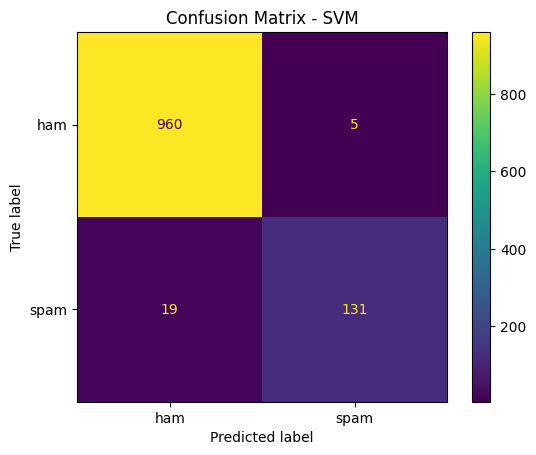

In [ ]:
# ========================
# 📦 1. Install & Import
# ========================
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ========================
# 📂 2. Upload & Extract Dataset
# ========================
from google.colab import files
uploaded = files.upload()

# Unzip uploaded file
for file_name in uploaded.keys():
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall()

# ========================
# 📊 3. Load and Clean Dataset
# ========================
df = pd.read_csv("spam.csv", encoding='latin-1')  # Adjust file name if needed
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.dropna(inplace=True)

# ========================
# 🧹 4. Preprocessing
# ========================
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # spam = 1, ham = 0

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# ========================
# ✨ 5. TF-IDF Vectorization
# ========================
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ========================
# 🤖 6. Model Training & Evaluation
# ========================

# -- Naive Bayes --
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_preds = nb.predict(X_test_tfidf)

print("📈 Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

# -- Logistic Regression --
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
lr_preds = lr.predict(X_test_tfidf)

print("📈 Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# -- Support Vector Machine --
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
svm_preds = svm.predict(X_test_tfidf)

print("📈 SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

# ========================
# 📉 7. Confusion Matrix (SVM)
# ========================
cm = confusion_matrix(y_test, svm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:
# 🔎 Enter your custom SMS
your_msg = ["Congratulations! You've won a free ticket to Bahamas. Call now to claim!"]

# 🔤 Preprocess using the same TF-IDF vectorizer
your_msg_tfidf = tfidf.transform(your_msg)

# ✅ Predict with any model (e.g., SVM)
prediction = svm.predict(your_msg_tfidf)

# 🧾 Show result
print("Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")


Prediction: Spam


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Probabilities for ROC and PR curves
nb_probs = nb.predict_proba(X_test_tfidf)[:, 1]
lr_probs = lr.predict_proba(X_test_tfidf)[:, 1]

# SVM doesn't support predict_proba directly, so use decision_function
svm_scores = svm.decision_function(X_test_tfidf)


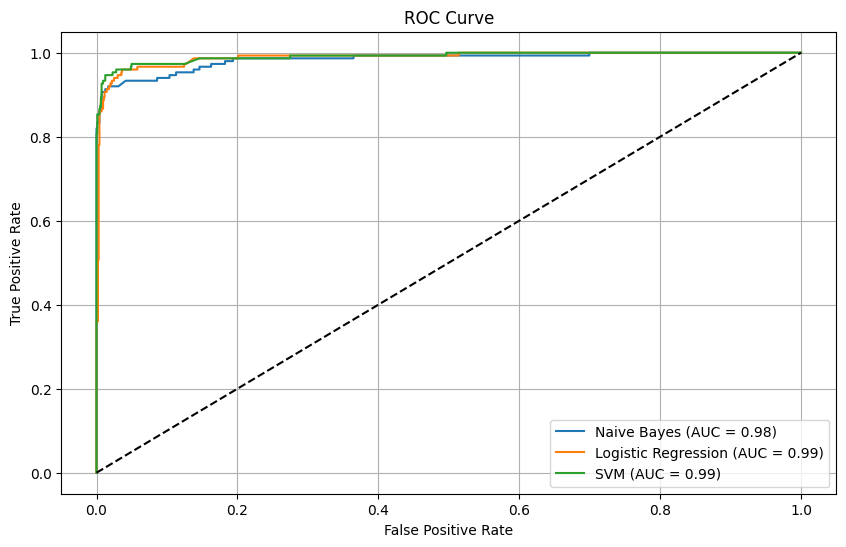

In [ ]:
# ROC Curves
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)

# AUC Scores
auc_nb = auc(fpr_nb, tpr_nb)
auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


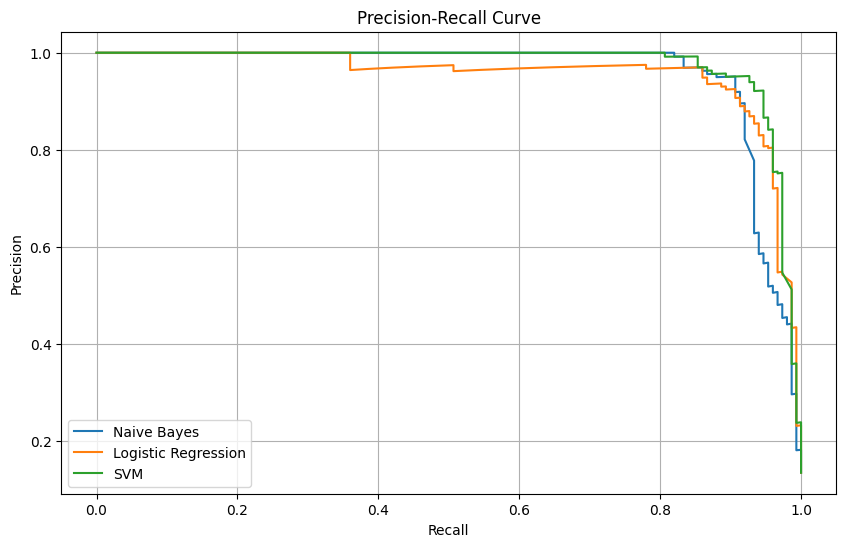

In [ ]:
# PR Curves
prec_nb, rec_nb, _ = precision_recall_curve(y_test, nb_probs)
prec_lr, rec_lr, _ = precision_recall_curve(y_test, lr_probs)
prec_svm, rec_svm, _ = precision_recall_curve(y_test, svm_scores)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(rec_nb, prec_nb, label='Naive Bayes')
plt.plot(rec_lr, prec_lr, label='Logistic Regression')
plt.plot(rec_svm, prec_svm, label='SVM')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


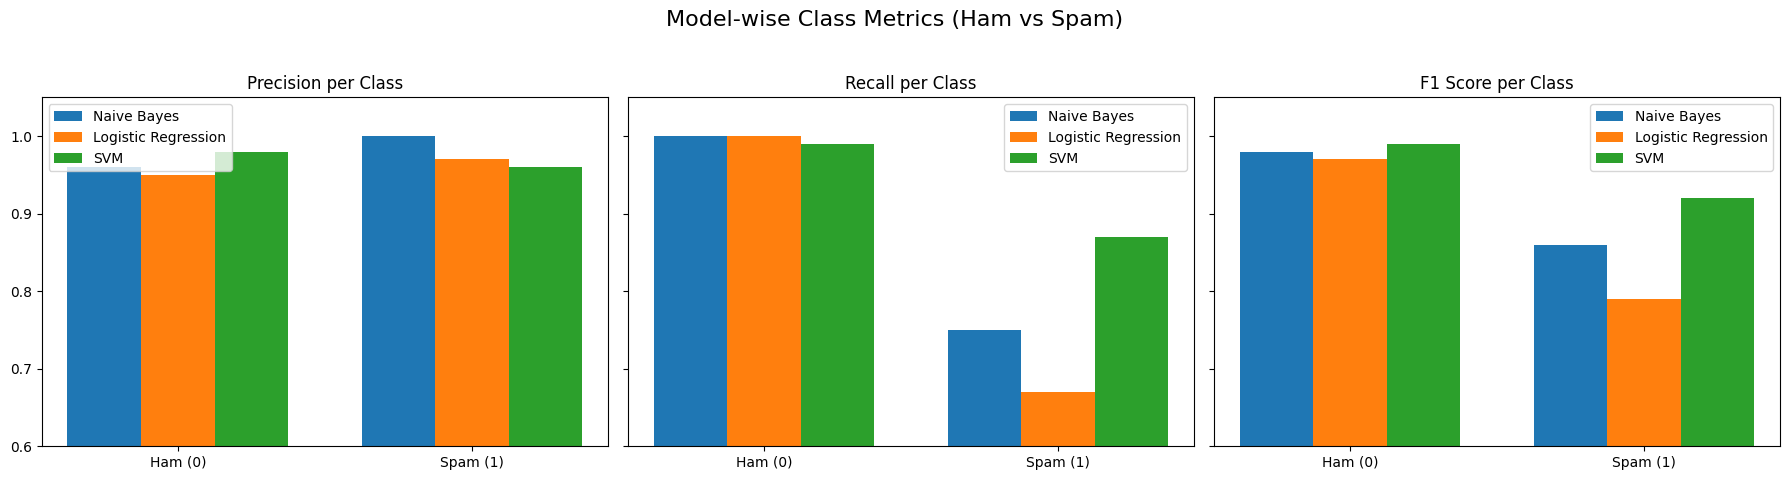

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class-wise metrics for each model: [Ham (0), Spam (1)]
precision = [
    [0.96, 1.00],  # Naive Bayes
    [0.95, 0.97],  # Logistic Regression
    [0.98, 0.96],  # SVM
]

recall = [
    [1.00, 0.75],
    [1.00, 0.67],
    [0.99, 0.87],
]

f1 = [
    [0.98, 0.86],
    [0.97, 0.79],
    [0.99, 0.92],
]

labels = ['Ham (0)', 'Spam (1)']
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot Precision
for i in range(len(models)):
    axs[0].bar(x + (i - 1) * width, precision[i], width, label=models[i])
axs[0].set_title('Precision per Class')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()
axs[0].set_ylim(0.6, 1.05)

# Plot Recall
for i in range(len(models)):
    axs[1].bar(x + (i - 1) * width, recall[i], width, label=models[i])
axs[1].set_title('Recall per Class')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()
axs[1].set_ylim(0.6, 1.05)

# Plot F1 Score
for i in range(len(models)):
    axs[2].bar(x + (i - 1) * width, f1[i], width, label=models[i])
axs[2].set_title('F1 Score per Class')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)
axs[2].legend()
axs[2].set_ylim(0.6, 1.05)

plt.suptitle('Model-wise Class Metrics (Ham vs Spam)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
